In [1]:
import pandas as pd
import numpy as np
import plotnine 
from plotnine import *
import os, sys, gc
from tqdm.notebook import tqdm

# TF-IDF를 이용한 추천시스템

문서간의 유사도를 생각해보자 -> 뭔가 겹치는 단어가 많다면, 서로 유사하다고 생각할 수 있다."

In [5]:
docs = [
  '먹고 싶은 사과', # 문서0 
  '먹고 싶은 바나나', # 문서1
  '길고 노란 바나나 바나나', # 문서2 
  '저는 과일이 좋아요' # 문서3 
]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() # Counter Vectorizer 객체 생성 

In [11]:
countvect = vect.fit_transform(docs)
countvect # 4개의 문서에서 9개의 단어들이 표현이 가능하다.

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [13]:
countvect.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [16]:
# 각 단어들이 어떤 인덱스를 갖고 있는지 표현해준다.
vect.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [17]:
sorted(vect.vocabulary_)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [20]:
import pandas as pd
counvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
counvect_df.index = ["문서1","문서2","문서3","문서4"]
counvect_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [23]:
# 코사인 유사도를 계산해보자
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(counvect_df, counvect_df)

array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

# TF-IDF 수행

단어의 빈도수 * (전체 문서에서 해당 단어가 몇번 나왔는지에 대한 Weight)

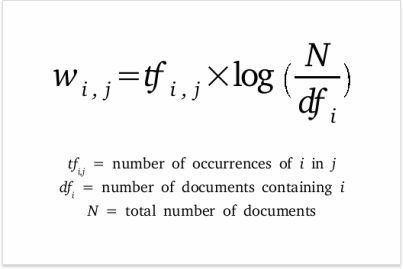

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 9) # 가장 빈도수가 많은 단어부터 시작해서 4개까지 사용 
tvect = vect.fit(docs)

# df
tfidv_df= pd.DataFrame(tvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [53]:
cosine_similarity(tfidv_df)

array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])